# Notebook to compare to merlin

In [2]:
from os import walk
import nibabel as nb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import nibabel as nb
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from nilearn_plotting_custom import plot_surf
from PIL import Image
from PIL import ImageDraw
import npp
import hcp_utils as hcp
from hcp_tools import load_flatmaps_59k
from hcp_tools import load_meshes
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import resample
from sklearn.preprocessing import StandardScaler
sns.set("paper", "white")
#%matplotlib inline
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
def load_data_merlin(subject,feature):
    # Inputs: subject = id eg 'sub-19'
    #         feature='as_scores'
    # Returns: X feature data (2D; time x feature)
    #          Y brain data (2D; time x grayordinate)
    im_file = f'../sourcedata/data/merlin/brain/merlin_cifti_clean_smooth/{str(subject)}_clean_smooth_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii'
    img = nb.load(im_file)
    Y = img.get_fdata()
    Y = Y[17:] #trim beginning, first 17 TRs
    Y = Y[:1009] #trim end to end of film    braintrain.append(s_brain[:-200,:]) #roughly 80 20 split, trim the last 200 TRs of each subject to save as test set
    Y = np.nan_to_num(Y)
    #load feature
    X = np.load(f'../sourcedata/data/merlin/features/Merlin_{feature}.npy')
    X = resample(X, Y.shape[0], axis=0) #resample to 1hz for now 
    #feat_x=feat_x.T
    #trim final movies
    vertex_info = hcp.get_HCP_vertex_info(img)
    return X,Y,vertex_info

In [5]:
X,Y,vertex_info = load_data_merlin('sub-19','as_scores')
X = hrf_tools.apply_optimal_hrf_10hz(X,(1/1.5))
scores_mean,corr_mean,weights_mean = simple_ridgeCV(X,Y)
subject='sub-19'
analysis.plot_results(scores_mean,'r2','32k',vertex_info,subject,'as_scores','merlin','ridgeCV')

FileNotFoundError: No such file or no access: '../sourcedata/data/merlin/brain/merlin_cifti_clean_smooth/sub-19_clean_smooth_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii'

## save list of subjects to a txt file

In [51]:
cleanpath='/om2/user/jsmentch/projects/speech_face_analysis/data/cifti/cleaned/'
subject_flist = list(walk(cleanpath))[0][2:][0]

In [55]:
subject_flist = [s_f[:6] for s_f in subject_flist]

In [57]:
with open("merlin_subjects.txt", 'w') as output:
    for row in subject_flist:
        output.write(str(row) + '\n')

Text(0, 0.5, '# voxels')

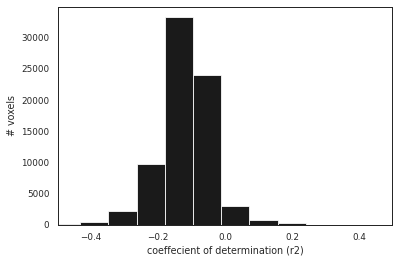

In [14]:
#plt.figure(figsize=(10,5))           
plt.hist(scores_mean,25,color='k')
plt.xlim(-0.5,0.5)
plt.xlabel('coeffecient of determination (r2)')
plt.ylabel('# voxels')

Text(0, 0.5, '# voxels')

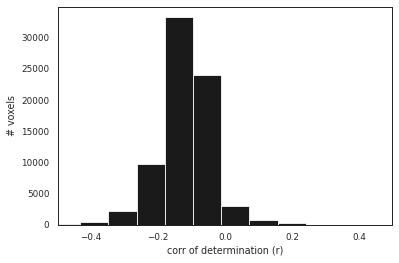

In [109]:
#plt.figure(figsize=(10,5))           
plt.hist(scores_mean,25,color='k')
plt.xlim(-0.5,0.5)
plt.xlabel('corr of determination (r)')
plt.ylabel('# voxels')

In [32]:
plot_32k_results(scores_mean,'r2',subject,feature,'merlin_encoding')

[-1.27620555 -1.2560505  -1.22764082 ...  0.33157008  0.33174205
  2.        ]
[-1.95929125 -1.72557674 -1.58966494 ...  0.46162916  0.46325908
  2.        ]
[-1.27620555 -1.2560505  -1.22764082 ...  0.33157008  0.33174205
  2.        ]
[-1.95929125 -1.72557674 -1.58966494 ...  0.46162916  0.46325908
  2.        ]


In [34]:
plot_32k_results(corr_mean,'r',subject,feature,'merlin_encoding')

[-0.24132409 -0.22983428 -0.22710414 ...         nan         nan
         nan]
[-0.23204213 -0.22651422 -0.21749859 ...         nan         nan
         nan]
[-0.24132409 -0.22983428 -0.2292875  ...         nan         nan
         nan]
[-0.23204213 -0.22651422 -0.21749859 ...         nan         nan
         nan]
